# [연습 자료] 스스로 따라쳐서 만들어보기.
B.A 수업자료 (BA help 참고)
* https://www.kirenz.com/post/2019-08-13-network_analysis/#social-network-analysis-with-networkx-in-python
* data information: https://snap.stanford.edu/data/egonets-Facebook.html
* data source: https://www.dropbox.com/s/k34phmodh9nsy9r/facebook_combined.txt?dl=0

# python- networkX 모듈 사용

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import warnings; warnings.simplefilter('ignore')

# 1. symmetric network (undirected=무방향성)
* The first network that we create is a group of people who work together.

In [2]:
G_symmetric = nx.Graph()

G_symmetric.add_edge('Steven',  'Laura')
G_symmetric.add_edge('Steven',  'Marc')
G_symmetric.add_edge('Steven',  'John')
G_symmetric.add_edge('Steven',  'Michelle')
G_symmetric.add_edge('Laura',   'Michelle')
G_symmetric.add_edge('Michelle','Marc')
G_symmetric.add_edge('George',  'John')
G_symmetric.add_edge('George',  'Steven')

* Nodes: The individuals whose network we are building.
* Edges: The connection between the nodes. It represents a relationship between the nodes of the network.

In [3]:
print(nx.info(G_symmetric))

Name: 
Type: Graph
Number of nodes: 6
Number of edges: 8
Average degree:   2.6667


* visualize a graph by using draw_networkX() function 

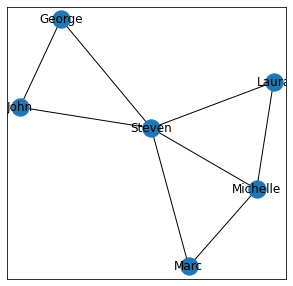

In [4]:
plt.figure(figsize=(5,5))
nx.draw_networkx(G_symmetric); 

# 2. Asymmetric Networks (directed=방향성o)

What if the relationship between nodes is ‘child of’, then the relationship is no longer symmetric.
* A is related to B, does not necessarily means that B is associated with A

We can build the asymmetric network in NetworkX using DiGraph method, which is short of Directional Graph.

In [5]:
G_asymmetric = nx.DiGraph() #DiGraph (directional)

G_asymmetric.add_edge('A','B') # A>B
G_asymmetric.add_edge('A','D') # A>D
G_asymmetric.add_edge('C','A') # C>A
G_asymmetric.add_edge('D','E') # D>E

* To make sure that all nodes are distinctly visible in the network, use the spring_layout() function, followed by the draw_networkx() function.

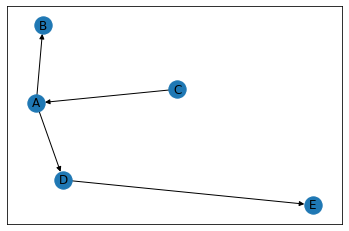

In [6]:
nx.spring_layout(G_asymmetric) # spring_layout()
nx.draw_networkx(G_asymmetric) # draw_networkx() 

# 3. Weighted Networks (가중치 부여)
* Let us make one again of the employees, but this time we add weight to the network, each edge has a weight signifying the number of projects they have done together.

In [7]:
G_weighted = nx.Graph()

G_weighted.add_edge('Steven',  'Laura',   weight=25)
G_weighted.add_edge('Steven',  'Marc',    weight=8)
G_weighted.add_edge('Steven',  'John',    weight=11)
G_weighted.add_edge('Steven',  'Michelle',weight=1)
G_weighted.add_edge('Laura',   'Michelle',weight=1)
G_weighted.add_edge('Michelle','Marc',    weight=1)
G_weighted.add_edge('George',  'John',    weight=8)
G_weighted.add_edge('George',  'Steven',  weight=4)

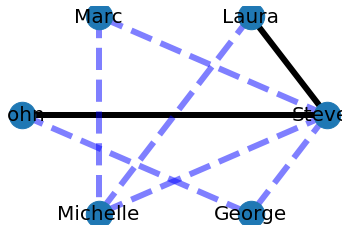

In [8]:
elarge = [(u, v) for (u, v, d) in G_weighted.edges(data=True) if d['weight'] > 8] # 가중치 8 초과
esmall = [(u, v) for (u, v, d) in G_weighted.edges(data=True) if d['weight'] <= 8] # 가중치 8 이하

pos = nx.circular_layout(G_weighted)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G_weighted, pos, node_size=700)

# edges
nx.draw_networkx_edges(G_weighted, pos, edgelist=elarge,width=6) # elarge edge 표현방식
nx.draw_networkx_edges(G_weighted, pos, edgelist=esmall,width=6, alpha=0.5, edge_color='b', style='dashed') #esmall edge 표현방식

# labels
nx.draw_networkx_labels(G_weighted, pos, font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show();

# Clustering coefficient
There is a tendency in a social network to form clusters.
* To determine the local clustering coefficient, we make use of nx.clustering(Graph, Node) function.

In [9]:
nx.clustering(G_symmetric,'Michelle')

0.6666666666666666

In [10]:
nx.clustering(G_symmetric,'Laura')

1.0

In [11]:
nx.average_clustering(G_symmetric)

0.8277777777777778

> In the symmetric employee-network, you will find that Michelle has a local clustering coefficient of 0.67 and Laura has a local clustering coefficient of 1.

> The average clustering coefficient (sum of all the local clustering coefficients divided by the number of nodes) for the symmetric employee-network is 0.867.

# 4. Network Distance Measures
: knowing how the information will spread through the network.

##  4.1 연결정도(Degree)
: 해당 노드에 직접 연결되어 있는 노드들의 개수, 또는 링크의 개수

연결정도가 높을수록 다른 노드들과 많은 관계를 가지고 있음을 보여주며 이는 상대적으로 높은 활동성과 영향력을 반증함

In [12]:
nx.degree(G_symmetric, 'Michelle')

3

> Michelle has worked with three employees in the network.

## 4.2 연결거리(Distance)
: 두개의 특정 노드들 사이에 존재하는 다양한 경로 중에서 가장 적은 수의 링크 단계를 거치는 경로, 즉 가장 짧은 연결 경로

In [13]:
nx.shortest_path(G_symmetric, 'Michelle', 'John') #경로

['Michelle', 'Steven', 'John']

In [14]:
nx.shortest_path_length(G_symmetric, 'Michelle', 'John') # 경로 길이

2

# 4.3 너비 우선 탐색 (Breadth-first search) 
루트 노드(혹은 다른 임의의 노드)에서 시작해서 인접한 노드를 먼저 탐색하는 방법
* 시작 정점으로부터 가까운 정점을 먼저 방문하고 멀리 떨어져 있는 정점을 나중에 방문하는 순회 방법이다.
* function bfs_tree 이용

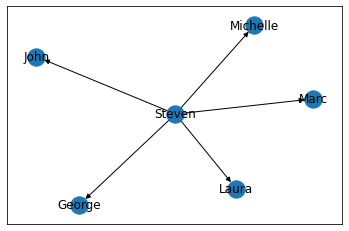

In [15]:
# Steven 기준 너비 우선 탐색
S = nx.bfs_tree(G_symmetric, 'Steven')
nx.draw_networkx(S)

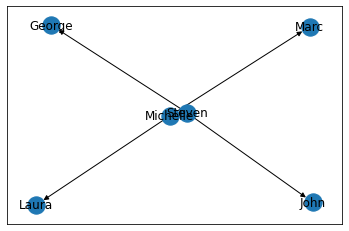

In [16]:
# Michelle
M = nx.bfs_tree(G_symmetric, 'Michelle')
nx.draw_networkx(M)

## 4.4 Eccentricity
The largest distance between A and all other nodes.(nx.eccentricity() function)

In [17]:
nx.eccentricity(G_symmetric,'Michelle')

2

In [18]:
nx.eccentricity(G_symmetric,'Steven')

1

# 5. Centrality measures  (중심성)
: 중심성 지표는 소셜 네트워크 분석 지표 중에서 일반적으로 가장 많이 사용되는 지표로 한 행위자가 전체 네트워크에서 중심에 위치하는 정도로 표현하는 지표
* 중심성 분석을 통해 전체 네트워크에서 중요한 역할을 하는 노드가 무엇인지 파악 가능

## 5.1 연결정도 중심성(Degree centrality)
: 한 노드가 얼마나 많은 다른 노드들과 연결관계를 맺고 있는 지 측정 (degree_centrality())
* It is based on the fact that important nodes have many connections.

In [19]:
nx.degree_centrality(G_symmetric)  

{'Steven': 1.0,
 'Laura': 0.4,
 'Marc': 0.4,
 'John': 0.4,
 'Michelle': 0.6000000000000001,
 'George': 0.4}

## 5.2 아이겐 벡터 중심성(Eigenvector centrality)
: 연결된 다른 노드들의 중요도를 함께 반영한 것 (eigenvector_centrality() function )

* 중심성이 높은 노드들과 많이 연결된 노드일수록 해당 노드의 아이겐벡터 중심성은 커짐
* 네트워크 상에서 소수 몇몇 영향력 높은 노드들에 연결되어 있는 것이 다수의 일반 노드들에 연결되어 있는 것보다 더 큰 영
향력을 가짐
* 즉 친구가 많은 것도 중요하지만 중요한 친구가 많은 지를 보고자 할 때 사용하는 지표

In [20]:
nx.eigenvector_centrality(G_symmetric)

{'Steven': 0.6006686104947806,
 'Laura': 0.3545677660798074,
 'Marc': 0.3545677660798074,
 'John': 0.30844592433424667,
 'Michelle': 0.4443904166426225,
 'George': 0.30844592433424667}

## 5.3 근접 중심성(Closeness centrality)
: 한 노드가 얼마나 전체 네트워크의 중심에 근접해 있는지를 측정
= 해당 노드가 전체 네트워크 상에서 얼마나 중앙에 위치하고 있는지를 측정

In [21]:
nx.closeness_centrality(G_symmetric)

{'Steven': 1.0,
 'Laura': 0.625,
 'Marc': 0.625,
 'John': 0.625,
 'Michelle': 0.7142857142857143,
 'George': 0.625}

## 5.4 매개 중심성(Betweenness centrality)
: 한 노드가 다른 노드들 간의 네트워크 관계 형성에 있어서 중개자 혹은 매개자 역할을 얼마나 수행하는 지 측정하는 지표
( betweenness_centrality() )
* 노드의 매개 중심성이 높을 수록 네트워크 내에서 정보 및 자원의 흐름에 있어서 높은 통제력 확보
* 매개 중심성이 높은 노드는 관계 연결의 길목에서 정보를 왜곡하거나 관계 활동의 방해를 통해 네트워크를 위협할 수 있음

In [22]:
nx.betweenness_centrality(G_symmetric)

{'Steven': 0.65,
 'Laura': 0.0,
 'Marc': 0.0,
 'John': 0.0,
 'Michelle': 0.05,
 'George': 0.0}

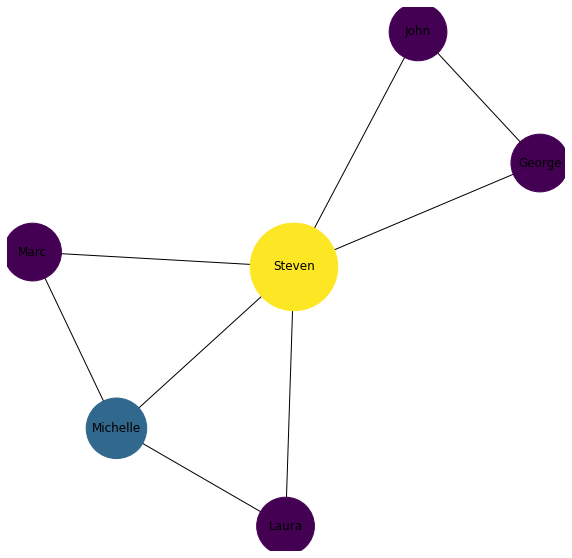

In [23]:
pos = nx.spring_layout(G_symmetric) # positions for all nodes
betCent = nx.betweenness_centrality(G_symmetric, normalized=True, endpoints=True)

node_color = [20000.0 * G_symmetric.degree(v) for v in G_symmetric]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(10,10))

nx.draw_networkx(G_symmetric, pos=pos, with_labels=True,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off');

In [24]:
sorted(betCent, key=betCent.get, reverse=True)[:5] # 상위 5개 정렬

['Steven', 'Michelle', 'Laura', 'Marc', 'John']

# 6. Facebook Case Study 실습

In [26]:
import pandas as pd

# !move C:\Users\7djyu\Downloads\facebook_combined.txt . # 다운로드한 파일 작업 디렉토리로 이동

In [27]:
df = pd.read_csv('facebook_combined.txt')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88233 entries, 0 to 88232
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0 1     88233 non-null  object
dtypes: object(1)
memory usage: 689.4+ KB


In [29]:
df.tail()

,0 1
88228,4026 4030
88229,4027 4031
88230,4027 4032
88231,4027 4038
88232,4031 4038


In [30]:
G_fb = nx.read_edgelist("facebook_combined.txt", create_using = nx.Graph(), nodetype=int)

In [31]:
print(nx.info(G_fb))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


* 네트워크망 그리기

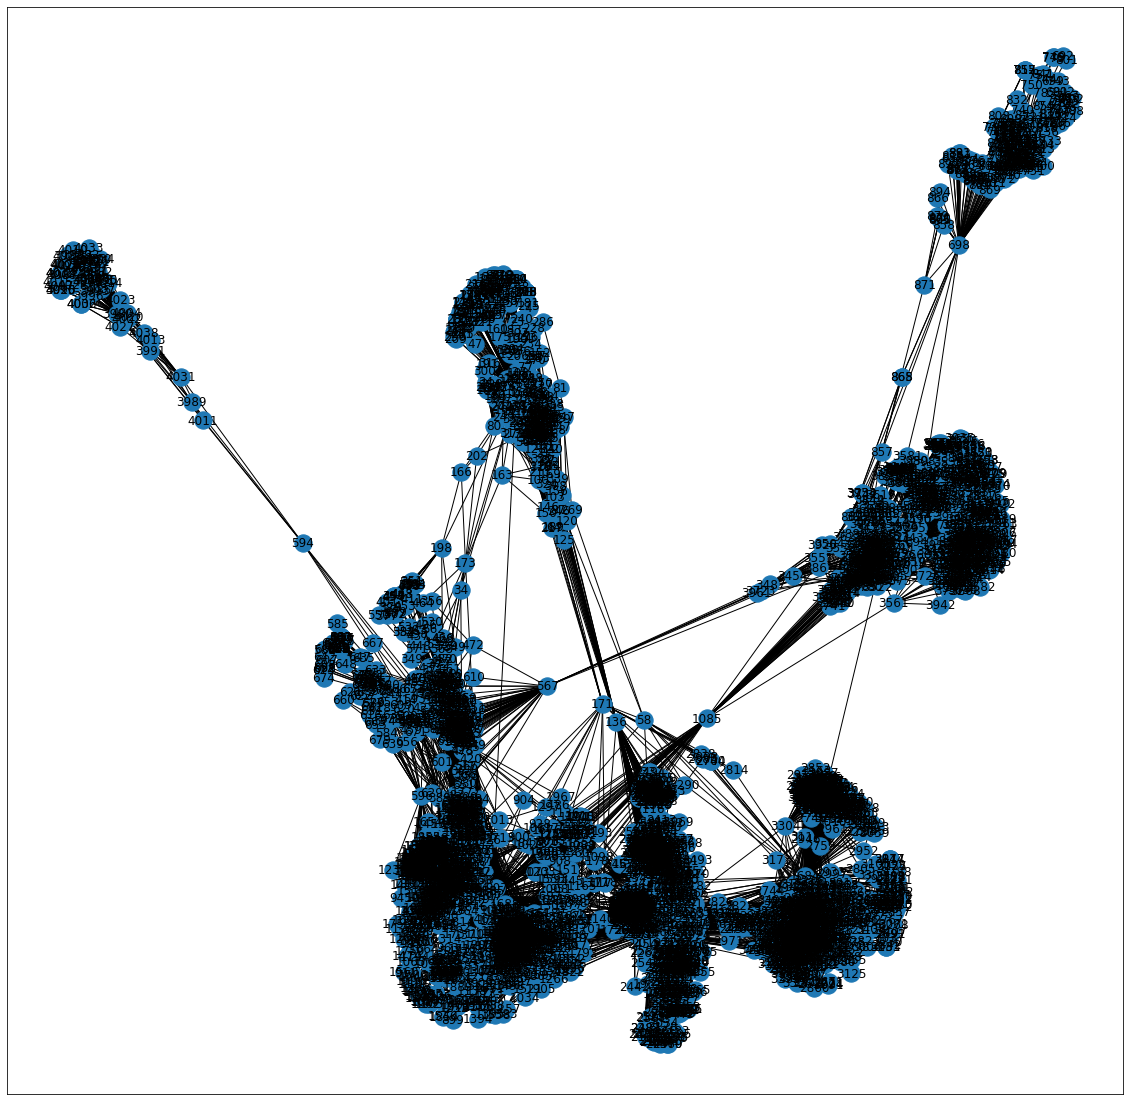

In [32]:
plt.figure(figsize=(20,20))
nx.draw_networkx(G_fb);

* Betweenness Centrality를 사용하여 노드 색상이 Degree 및 노드 크기에 따라 달라 지도록 네트워크를 시각화

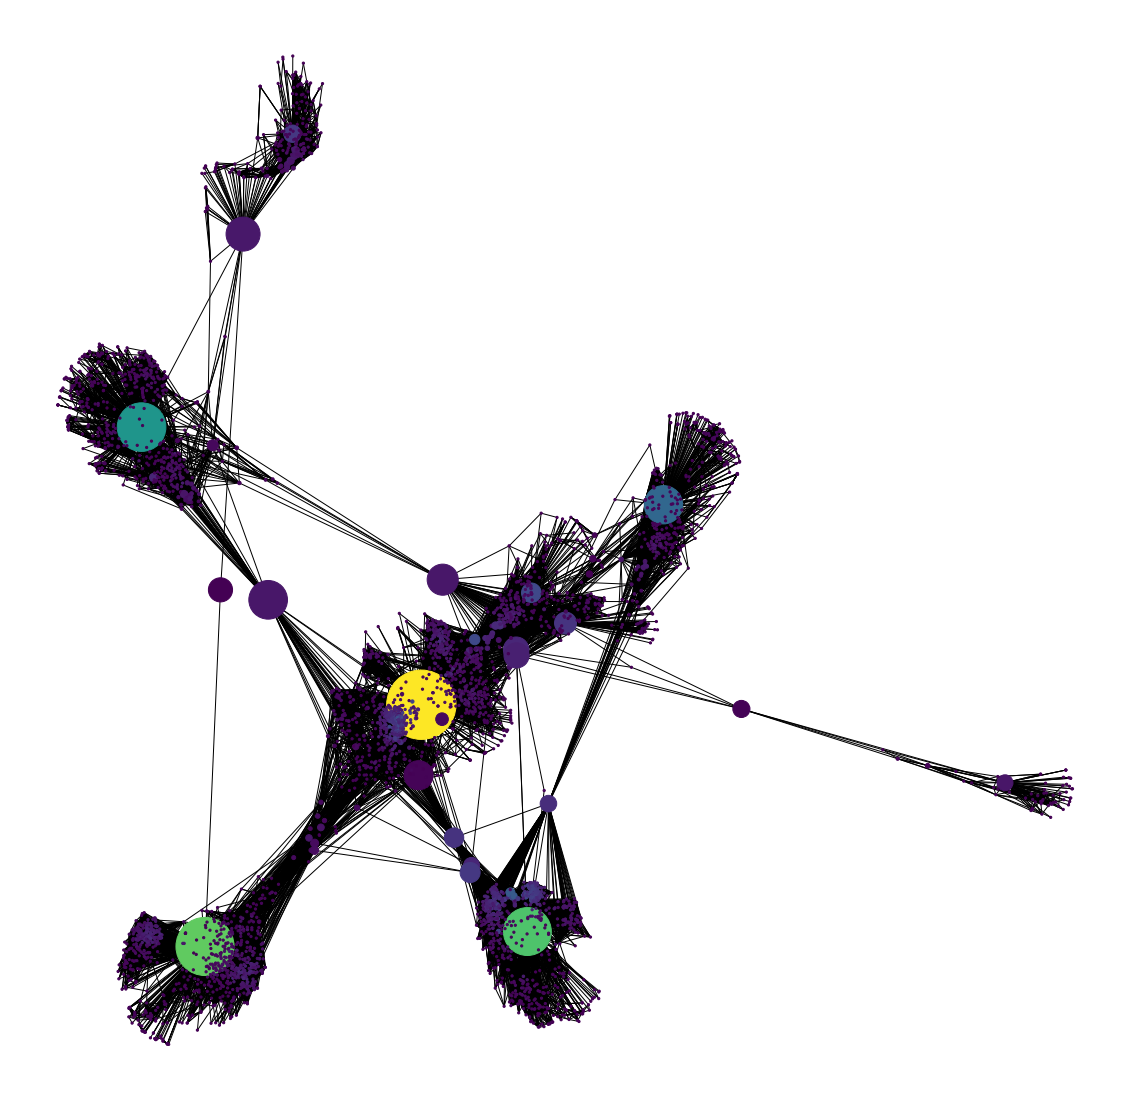

In [36]:
pos = nx.spring_layout(G_fb)
betCent = nx.betweenness_centrality(G_fb, normalized=True, endpoints=True)
node_color = [20000.0 * G_fb.degree(v) for v in G_fb]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G_fb, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off');

In [37]:
sorted(betCent, key=betCent.get, reverse=True)[:5]

[107, 1684, 3437, 1912, 1085]